In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats #for QQ plot

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.sample()

,Survived,Age,Fare
89,0,24.0,8.05


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X= df.iloc[:,1:3]
y= df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


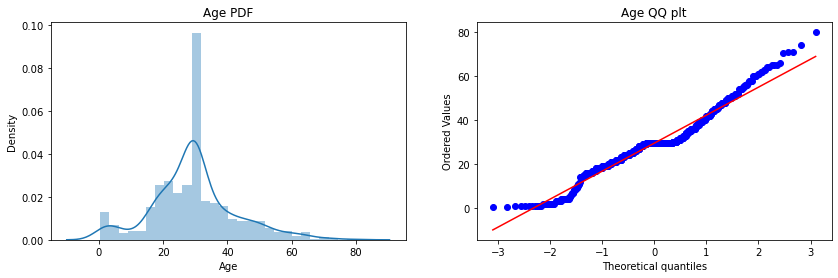

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot= plt)
plt.title('Age QQ plt')

plt.show()

/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


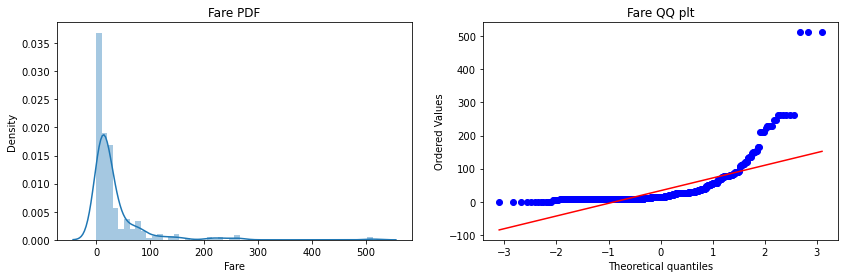

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot= plt)
plt.title('Fare QQ plt')

plt.show()

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)


DecisionTreeClassifier()

In [17]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR: ",accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred1))

Accuracy LR:  0.7150837988826816
Accuracy DT:  0.6703910614525139


In [18]:
# apply function transformer

trf = FunctionTransformer(func=np.log1p) 
# log1p will add 1 to the log value

In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [22]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR: ", accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred1))

Accuracy LR:  0.6983240223463687
Accuracy DT:  0.6536312849162011


## accuracy of logistic regression get less after transform cz the data of age is not  right skewed

In [23]:
# will apply cross-val score
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT: ",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR:  0.678027465667915
DT:  0.6588389513108613


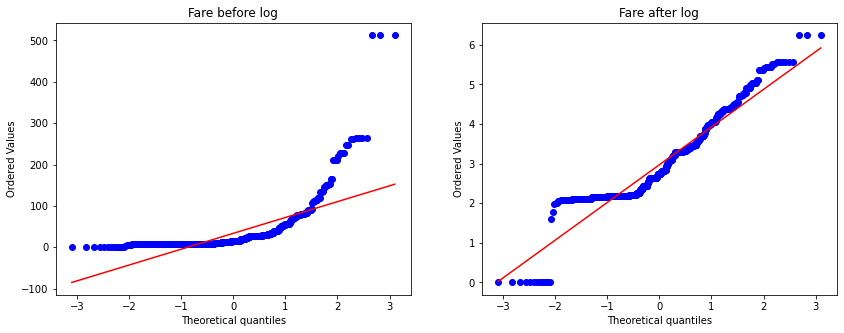

In [25]:
# before and after
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title("Fare after log")

plt.show()

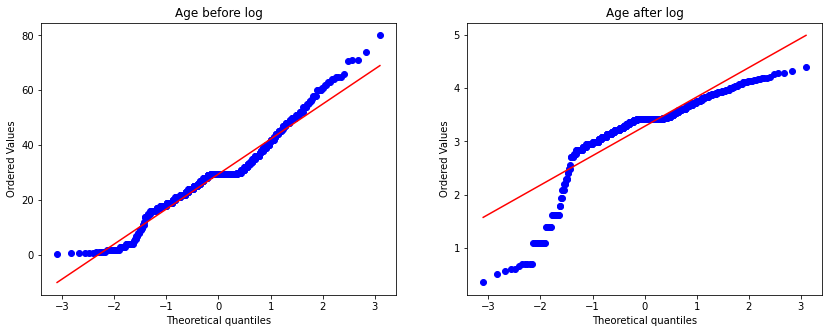

In [26]:
# before and after
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age before log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title("Age after log")

plt.show()

## Now we will do the same, but apply logTransform in fare only,, as age is almost normal before transformation

In [27]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [28]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 =DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR: ", accuracy_score(y_test,y_pred))
print("Accuracy DT: ", accuracy_score(y_test,y_pred2))


Accuracy LR:  0.664804469273743
Accuracy DT:  0.6703910614525139


In [37]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT: ",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR:  0.6712609238451936
DT:  0.6633208489388264


## applying custom function


In [50]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy ", np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title("Fare before transform")
    
    plt.subplot(122)
    #stats.probplot(X_trans['Fare'],dist="norm",plot=plt) we can't write this...always go with index
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare after transform")
    
    plt.show()

Accuracy  0.6589013732833957


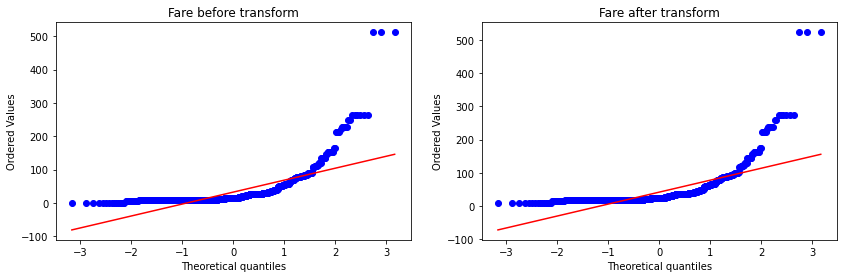

In [62]:
apply_transform(lambda x:(1/0.1+x))